# Supervised Learning Model Evaluation for stroke diagnosis

Stroke diagnosis involves a comprehensive assessment to determine the presence, type, and severity of a stroke, a serious medical condition characterized by disrupted blood flow to the brain along with demographic details of the patients. 

DATA DESCRIPTION FOR CATEGORICAL VARIABLE:

1. gender:
Male = 1
Female = 2
Other = 3

2. ever_married:
Yes = 1
No = 2

3. work_type:
Children = 1
Private = 2
Self-employed = 3
Govt_job = 4
Never_worked = 5

4. Residence_type:
Rural = 1
Urban = 2

5. Smoking status:
smokes = 1
unknown = 2
formerly smoked = 3
never smoked = 4


1. Import the stroke.csv dataset, get info, print header and examine the data

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv('stroke.csv')
df.shape

(1137, 11)

In [13]:
df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,2,31,0,0,2,4,1,70.66,27.2,4,0
1,2,13,0,0,2,1,1,85.81,18.6,2,0
2,1,18,0,0,2,2,2,60.56,33.0,4,0


In [14]:
df.info

<bound method DataFrame.info of       gender age  hypertension  heart_disease  ever_married  work_type   
0          2  31             0              0             2          4  \
1          2  13             0              0             2          1   
2          1  18             0              0             2          2   
3          2  65             0              0             1          2   
4          1   4             0              0             2          1   
...      ...  ..           ...            ...           ...        ...   
1132       2   1             0              0             2          1   
1133       1   6             0              0             2          1   
1134       1  81             0              0             1          2   
1135       2  81             1              0             1          2   
1136       2  57             1              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0      

2. The target variable is stroke, perform model evaluation by comparing 4 different algorithms. Determine the model accuracy. Plot confusion matrix for all four algorithms. Compare the model accuracy and determine which algorithm is the best fit to predict the diagnosis of stroke. 

In [26]:
df.isnull().sum()

gender                0
age                   0
hypertension          0
heart_disease         0
ever_married          0
work_type             0
Residence_type        0
avg_glucose_level     0
bmi                  52
smoking_status        0
stroke                0
dtype: int64

In [29]:
df.bmi.skew()

0.7461140265428874

<AxesSubplot:ylabel='Frequency'>

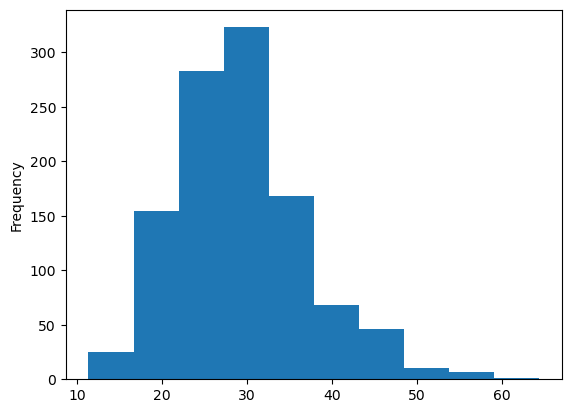

In [30]:
df.bmi.plot(kind='hist')

In [37]:
df.bmi = df.bmi.fillna(df.bmi.median())

In [38]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [45]:
df.dtypes

gender                 int64
age                   object
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [60]:
df.age.value_counts()

age
79    26
57    24
78    24
52    23
81    22
      ..
3      7
35     7
12     6
4      6
82     1
Name: count, Length: 84, dtype: int64

In [59]:
df[df['age'] == '*82']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [58]:
df.loc[586, 'age'] = 82

In [63]:
df.age = df.age.astype('int')

In [64]:
df.dtypes

gender                 int64
age                    int64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [65]:
y = df.stroke.values
X = df.drop('stroke', axis = 1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [86]:
accuracies = {}

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
acc = lr.score(X_test, y_test)*100
accuracies['Logistic Regression'] = acc

dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, y_train)
acc = dtc.score(X_test, y_test)*100
accuracies['Decision Tree Classifier'] = acc

rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
acc = rf.score(X_test, y_test)*100
accuracies['Random Forest Classifier'] = acc

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
acc = knn.score(X_test, y_test)*100
accuracies['KNeighbors Classifier'] = acc

for k,v in accuracies.items():
    print(f"{k}: {v:.2f}%".format())

/home/tooshy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 87.13%
Decision Tree Classifier: 78.65%
Random Forest Classifier: 84.21%
KNeighbors Classifier: 83.04%


In [87]:
from sklearn.metrics import confusion_matrix

y_head_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_head_lr)

y_head_dtc = dtc.predict(X_test)
cm_dtc = confusion_matrix(y_test, y_head_dtc)

y_head_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_head_rf)

y_head_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_head_knn)

<AxesSubplot:title={'center':'KNeighbors Classifier Confusion Matrix'}>

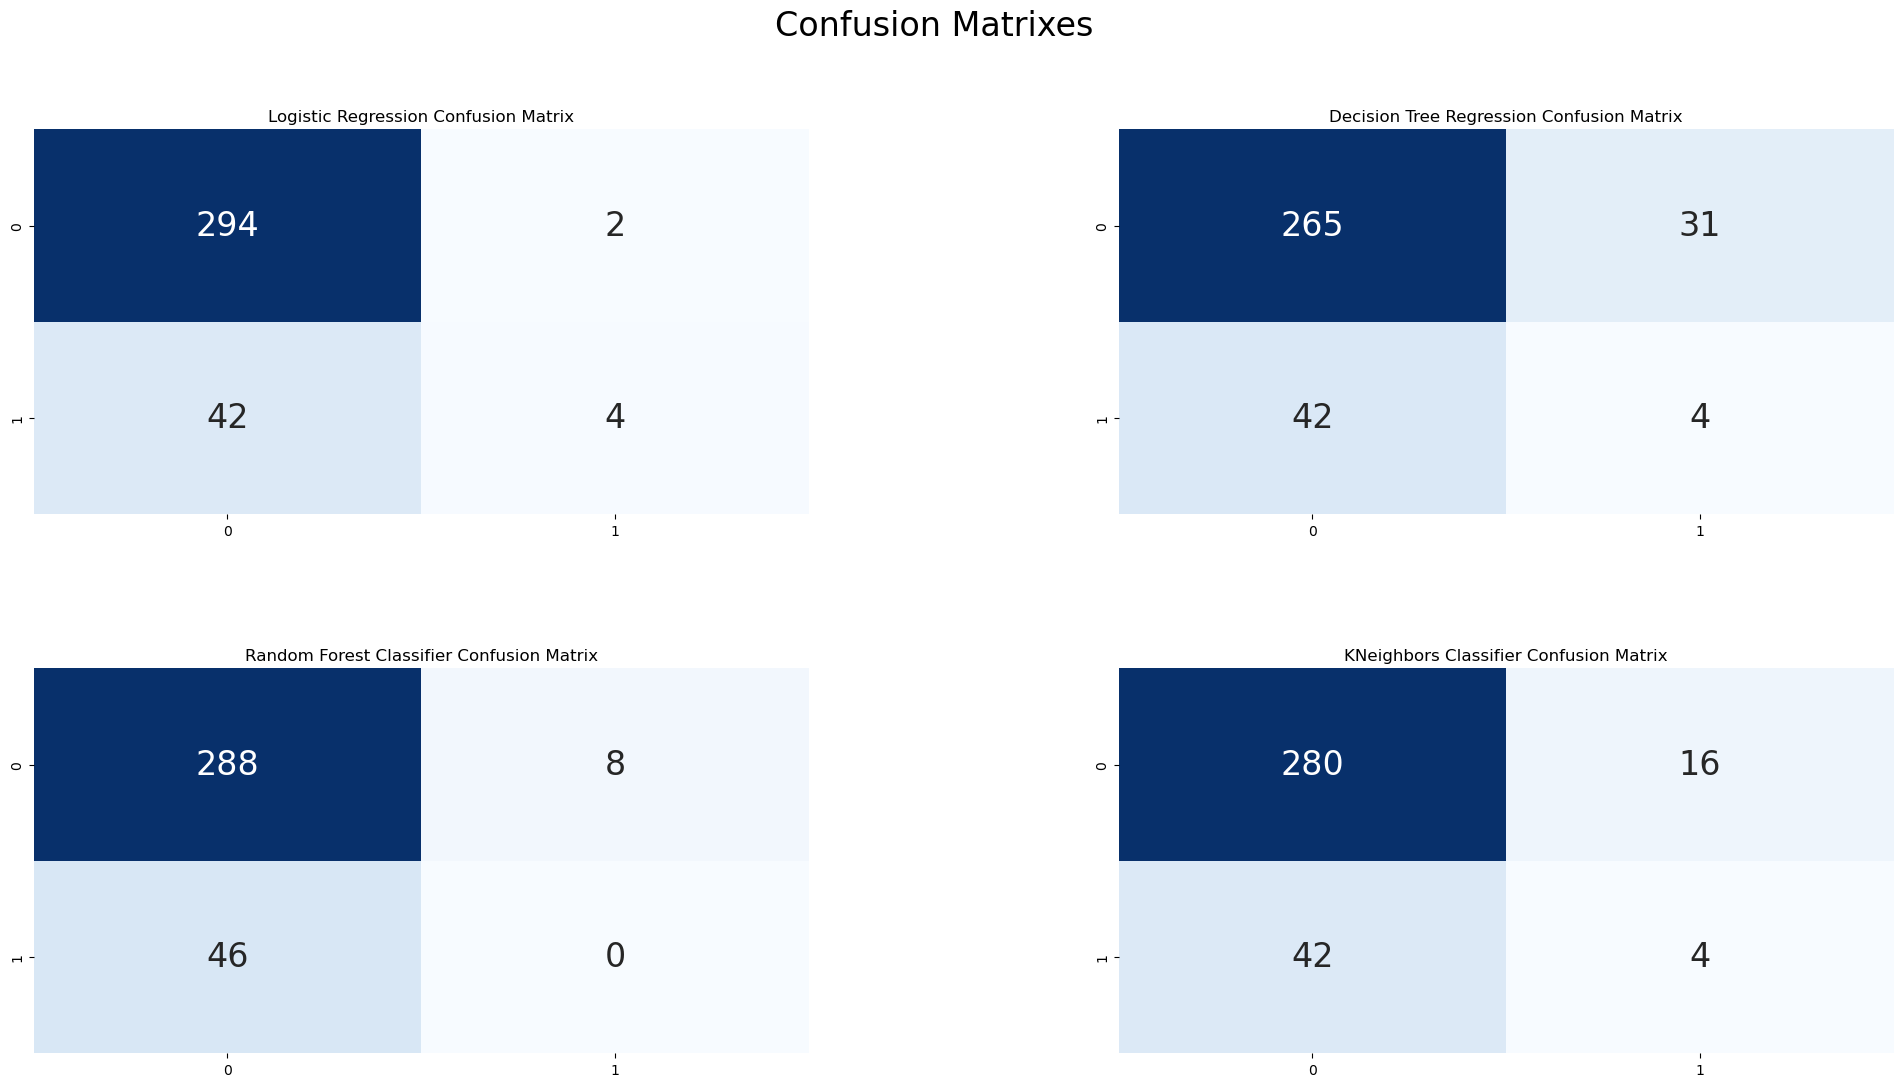

In [88]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Regression Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("Random Forest Classifier Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,4)
plt.title("KNeighbors Classifier Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

**Interpretation**: 